# Particle Tracking Code Part Two

This second part of the code takes all the MSDs you found and SAVED from part one and averages them. Plots all the averaged MSDs vs time on the same plot for each of the frame rates you tried for ONE sample. Ex. If you took videos of a sample at 11fps, 29fps, and 40fps, you will get a plot with three different lines.

In [65]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python

%matplotlib inline

import mpld3 #For making nice looking plots
#If mpld3 is not available, install with conda (run "conda install mpld3" in Anaconda
# command prompt)

mpld3.enable_notebook()
import matplotlib
from matplotlib import pylab

#For making interactive user interfaces (buttons and sliders and such)
import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

#Loading the particle tracking software
import sys
##MAC
sys.path.append("..//track") #Locate code
##PC
# sys.path.append("..\\track")
import mpretrack #The file mpretrack.py and trackmem.py should be in the location above
import trackmem
import bpass
import tiff_file #Ignore any warnings importing this may cause
import pickle
import os
import fnmatch
import pandas as pd
from pandas import DataFrame
from array import *

In [239]:
#Now let's locate the data
##MAC 
#data_directory = "//Volumes//USB DISK//60fps_2//" #Notice the double slashes!

##PC
data_directory = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\"
data_file = data_directory.split('\\')[-2]+"_MMStack_Pos0.ome.tif"

In [240]:
foldername = os.listdir(data_directory)[0] ##10fps, 29fps, 40fps etc.
print foldername
directory2 = data_directory+ foldername + "\\MSD\\"
print directory2
msdcount= len(fnmatch.filter(os.listdir(directory2), '*msd*'))
print msdcount

40
Z:\ChristelleSummer2018\Data\BeadsInConditions\Copolymerized\2018_07_17\40\MSD\
2


# Finding the inital diffusion coefficient

In [ ]:
 = np.array([1, 2, 3])
>>> b = np.array([2, 3, 4])
>>> np.vstack((a,b))
array([[1, 2, 3],
       [2, 3, 4]])

In [244]:
##9.5FPS
frame_rate=9.5
Amsd1= pickle.load(open("Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\9.5\\MSD\\msd1.p",'rb'))
Atimes1 = np.arange(1,len(Amsd1)+1)/frame_rate
Amsd2= pickle.load(open("Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\9.5\\MSD\\msd2.p",'rb'))
Atimes2 = np.arange(1,len(Amsd2)+1)/frame_rate
##40 FPS
frame_rate= 40.0
Bmsd1= pickle.load(open("Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\MSD\\msd1.p",'rb'))
Btimes1 = np.arange(1,len(Bmsd1)+1)/frame_rate
Bmsd2= pickle.load(open("Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\MSD\\msd2.p",'rb'))
Btimes2 = np.arange(1,len(Bmsd2)+1)/frame_rate
# ##40fps
# frame_rate= 40.0
# Cmsd1= pickle.load(open("Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_13\\40\\MSD\\1msd.p",'rb'))
# Ctimes1 = np.arange(1,len(Cmsd1)+1)/40.0

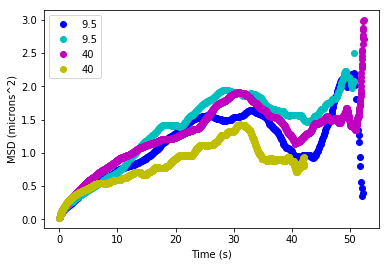

In [246]:
    mpld3.enable_notebook()
    
    pylab.plot(Atimes1,Amsd1,'bo', label=9.5) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Atimes2,Amsd2,'co',label=9.5) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Btimes1,Bmsd1,'mo',label=40) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Btimes2,Bmsd2,'yo',label=40) #Plot mean-squared displacement versus time with red filled circlesal
    
    pylab.legend() #puts the 'label' on the plot
    pylab.xlabel('Time (s)');
    pylab.ylabel('MSD (microns^2)');
    
    figure1 = pylab.savefig(data_directory+'\\MSDPlot.png')  
    #pickle.dump(averagemsds, open(directory2+ '\\AveragedMeanSquaredDisplacement.p', 'wb'))
  
    #np.savetxt(directory2+'AveragedTimesMsd.txt',np.transpose((times,averagemsds)),delimiter=',')
    

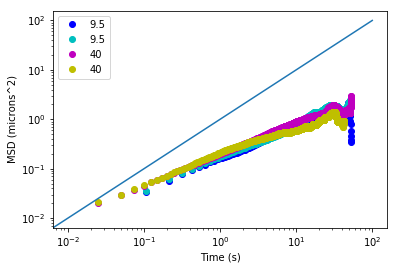

In [248]:
    mpld3.enable_notebook()
    
    pylab.loglog(Atimes1,Amsd1,'bo', label=9.5) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Atimes2,Amsd2,'co',label=9.5) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Btimes1,Bmsd1,'mo',label=40) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.plot(Btimes2,Bmsd2,'yo',label=40) #Plot mean-squared dt mean-squared displacement versus time with red filled circlesal
    pylab.loglog([0,.01,1, 2, 3, 4,100], [0,.01,1, 2, 3, 4,100])
    pylab.legend() #puts the 'label' on the plot
    pylab.xlabel('Time (s)');
    pylab.ylabel('MSD (microns^2)');
    
    pylab.savefig(data_directory+'\\AllVidMSDLogLogPlot.pdf')  
    pylab.savefig(data_directory+'\\AllVidNSDLogLogPlot.png')  

    

In [250]:
ImportantValues =['Start', 'End', 'D','Alpha','Coeff','Start2', 'End2', 'D2','Alpha2','Coeff2',
                 'Start3', 'End3', 'D3','Alpha3','Coeff3','Start4', 'End4', 'D4','Alpha4','Coeff4',
                  'Start5', 'End5', 'D5','Alpha5','Coeff5']
Columns = ['2018_07_17Copoly9.5fps','2018_07_17Copoly9.5fps','2018_07_17Copoly40fps','2018_07_17Copoly40fps']## this might not be correct...better to use indeinxg 
d = np.zeros((25,4))
df = pd.DataFrame(d,index=ImportantValues,columns=Columns)

0s to 1s
Found diffusion coeff D = 0.0471 (microns^2/s)
Alpha value: 0.6511 
Coefficient value: 0.210 
----------------
0s to 5s
Found diffusion coeff D = 0.0194 (microns^2/s)
Alpha value: 0.5790 
Coefficient value: 0.199 
----------------
5s to 10s
Found diffusion coeff D = 0.0052 (microns^2/s)
Alpha value: 0.2894 
Coefficient value: 0.303 
----------------
5s to 15s
Found diffusion coeff D = 0.0058 (microns^2/s)
Alpha value: 0.3662 
Coefficient value: 0.261 
----------------
10s to 50s
Found diffusion coeff D = 0.0028 (microns^2/s)
Alpha value: 0.3689 
Coefficient value: 0.288 
----------------


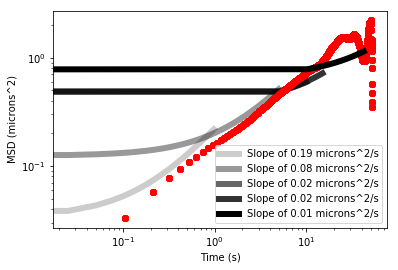

In [261]:

mpld3.enable_notebook()

cutoff_start =[0,0, 5, 5,10]
cutoff_stop = [1,5,10,15,50]
DiffusionCoeffs = np.empty(len(cutoff_start))
AlphaValues = np.empty(len(cutoff_start))
goo= 3
times= Btimes2
msd = Bmsd2
for p in range(0, len(cutoff_start)):
    start = cutoff_start[p]
    stop = cutoff_stop[p]
   
    x = np.where(times >= start) ## returns indices
    y = np.where(times < stop) ## returns indices
    z = x[0][0]
    zz = y[0][(np.shape(y)[1]-1)]
    K = np.linspace(z,zz,zz-z+1)
    K = K.astype(int)
    
    pylab.loglog(Atimes1, Amsd1,'ro') #Plot mean-squared displacement versus time with red filled circles
    linear_fit = np.polyfit(times[K][0:], msd[K][0:],1) #fit to polynomial of order 1 (i.e., a line)
    values_from_fit = np.polyval(linear_fit, np.hstack((np.array([0]),times[K]))) #evaluate polynomial
    pylab.loglog(np.hstack((np.array([0]),times[K])), values_from_fit,
             '-k', lw=6, alpha= .2*(p+1), label = r"Slope of %.2f microns^2/s" % linear_fit[0])
   
    df.iloc[[5*p],[goo]]= start
    df.iloc[[5*p+1],[goo]]= stop
    df.iloc[[5*p+2],[goo]]= .25*linear_fit[0]
    print str(start)+'s to ' + str(stop) + 's'
   # print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##not sure what this is...is it correct?
    print "Found diffusion coeff D = %.4f (microns^2/s)" % (0.25*linear_fit[0])
    DiffusionCoeffs[p]=0.25*linear_fit[0]
    
    abc = np.where(times < stop)
    efg = np.where(times >= start)
    end = abc[0][-1]
    begin = efg[0][0]
#     if (begin < 4):
#         begin = 1
#         logtimes = np.log(times[begin:end])
#         logmsd = np.log(msd[begin:end])
#         fit = np.polyfit(logtimes,logmsd,1)
#         alphapower = fit[0]
#         logx = fit[1]
#         k= np.exp(logx)
#         print "Alpha value: %.4f " % alphapower
#         print "Coefficient value: %.3f " % k
#         df.iloc[[5*p+3],[a]]= alphapower
#         df.iloc[[5*p+4],[a]]= k
#     else:
    logtimes = np.log(times[begin:end])
    logmsd = np.log(msd[begin:end])
    fit = np.polyfit(logtimes,logmsd,1)
    alphapower = fit[0]
    logx = fit[1]
    k= np.exp(logx)
    print "Alpha value: %.4f " % alphapower
    print "Coefficient value: %.3f " % k
    df.iloc[[5*p+3],[goo]]= alphapower
    df.iloc[[5*p+4],[goo]]= k
       
    AlphaValues[p]= alphapower
    print ("----------------")
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
   
pylab.savefig(data_directory+'\\MSDLogLogPlot.png')  

In [262]:

df.to_csv(data_directory+'ParticleTrackingResults.csv', index=True, header=True)
df

,2018_07_17Copoly9.5fps,2018_07_17Copoly9.5fps,2018_07_17Copoly40fps,2018_07_17Copoly40fps
Start,0.000000,0.000000,0.000000,0.000000
End,1.000000,1.000000,1.000000,1.000000
D,0.035324,0.037839,0.043515,0.047136
Alpha,0.709592,0.705038,0.632089,0.651073
Coeff,0.169215,0.178480,0.199062,0.210201
Start2,0.000000,0.000000,0.000000,0.000000
End2,5.000000,5.000000,5.000000,5.000000
D2,0.020088,0.018691,0.025333,0.019405
Alpha2,0.649673,0.620549,0.640760,0.578957
Coeff2,0.156068,0.165905,0.199865,0.198805


In [179]:
# filecount = len(fnmatch.filter(os.listdir(data_directory), '*')) ##number of frame rates taken(ex3) must be saved as fps
# for a in range (0,filecount): ##for each frame rate
#     foldername = os.listdir(data_directory)[a] ##10fps, 29fps, 40fps etc.
#     frame_rate = float(foldername)
#     directory2 = data_directory+foldername+"\\MSD\\" ##"Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\MSD"
#     msdcount= len(fnmatch.filter(os.listdir(directory2), '*msd*.p')) ##finds the number of MSD tracks
#     allmsds = ([])
#     for b in range (0, msdcount): ## for each video
#         msdfilename = os.listdir(directory2)[b] ##2018_07_09_40fps_1msd.p,2018_07_09_40fps_2msd.p, etc...
#         msdfilepath = directory2  + msdfilename
#         f = open(msdfilepath,'rb')
#         print msdfilepath
#         if (b==0):
#             msd0 = pickle.load(f)
#         elif(b ==1):
#             msd1 = pickle.load(f)
#         elif (b ==2):
#             msd2 = pickle.load(f)
#         elif (b ==3):
#             msd3 = pickle.load(f)
#         f.close()
#       ##shorten this code later...
#     ##combining all the MSDs into a 2D array, where each row is the MSDs for one video
  
#     for c in range(0,msdcount):
#         if (c==0):
#             msd = msd0
#         elif(c ==1):
#             msd = msd1
#         elif (c ==2):
#             msd= msd2
#         elif (c ==3):
#             msd = msd3
#         allmsds.append([])
        
#         for d in range(0,len(msd)):
#             allmsds[c].append(msd[d])
#     averagemsds = np.mean(allmsds, axis=0)
#     times = np.arange(1,len(averagemsds)+1)/frame_rate
    
#     mpld3.enable_notebook()
    
#     if(a==0):
#         color = 'bo'
#     elif(a==1):
#         color = 'ro'
#     elif(a==2):
#         color = 'go'

#     figure1 = pylab.plot(times, averagemsds,color,label = r"%.1f fps" % frame_rate) #Plot mean-squared displacement versus time with red filled circlesal
#     pylab.legend() #puts the 'label' on the plot
#     pylab.xlabel('Time (s)');
#     pylab.ylabel('MSD (microns^2)');
    
#     #figure1 = pylab.savefig(data_directory+'\\MSDLogLogPlot.png')  
#     #pickle.dump(averagemsds, open(directory2+ '\\AveragedMeanSquaredDisplacement.p', 'wb'))
  
#     #np.savetxt(directory2+'AveragedTimesMsd.txt',np.transpose((times,averagemsds)),delimiter=',')
    
   

In [90]:
msdfilepath

'Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\MSD\\msd2.p'

In [81]:
np.shape(allmsds)

(3779L,)

In [ ]:
ImportantValues =['Start', 'End', 'D','Alpha','Coeff','Start2', 'End2', 'D2','Alpha2','Coeff2',
                 'Start3', 'End3', 'D3','Alpha3','Coeff3']
Columns = [os.listdir(data_directory)[0],os.listdir(data_directory)[1], os.listdir(data_directory)[2]]## this might not be correct...better to use indeinxg 
d = np.zeros((15,3))
df = pd.DataFrame(d,index=ImportantValues, columns= Columns)


In [ ]:
filecount = len(fnmatch.filter(os.listdir(data_directory), '*')) ##number of frame rates taken(ex3) must be saved as fps
for a in range (0,filecount): ##for each frame rate
    foldername = os.listdir(data_directory)[a] ##10fps, 29fps, 40fps etc.
    frame_rate = float(foldername)
    directory2 = data_directory+foldername+"\\MSD\\" ##"Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\MSD"
    msdcount= len(fnmatch.filter(os.listdir(directory2), '*msd*')) ##finds the number of MSD tracks
    
    allmsds=[]
    for b in range (0, msdcount): ## for each video
        msdfilename = os.listdir(directory2)[b] ##2018_07_09_40fps_1msd.p,2018_07_09_40fps_2msd.p, etc...
        msdfilepath = directory2 + "\\" + msdfilename
        f = open(msdfilepath,'rb')
        if (b==0):
            msd0 = pickle.load(f)
        elif(b ==1):
            msd1 = pickle.load(f)
        elif (b ==2):
            msd2 = pickle.load(f)
        elif (b ==3):
            msd3 = pickle.load(f)
        f.close()
      ##shorten this code later...
    ##combining all the MSDs into a 2D array, where each row is the MSDs for one video
    for c in range(0,msdcount):
        if (c==0):
            msd = msd0
        elif(c ==1):
            msd = msd1
        elif (c ==2):
            msd= msd2
        elif (c ==3):
            msd = msd3
        allmsds.append([])
        
        for d in range(0,len(msd)):
            allmsds[c].append(msd[d])
    averagemsds = np.mean(allmsds, axis=0)
    times = np.arange(1,len(averagemsds)+1)/frame_rate
    
    mpld3.enable_notebook()
    
    if(a==0):
        color = 'bo'
    elif(a==1):
        color = 'ro'
    elif(a==2):
        color = 'go'

    figure1 = pylab.loglog(times, averagemsds,color,label = r"%.1f fps" % frame_rate) #Plot mean-squared displacement versus time with red filled circlesal
    pylab.legend() #puts the 'label' on the plot
    pylab.xlabel('Time (s)');
    pylab.ylabel('MSD (microns^2)');
    
    cutoff_start =[0,5,0]
    cutoff_stop = [5,15,50]
    DiffusionCoeffs = np.empty(len(cutoff_start))
    AlphaValues = np.empty(len(cutoff_start))
    
    
    for p in range(0, len(cutoff_start)): ##for each of the time intervals
        start = cutoff_start[p]
        stop = cutoff_stop[p]
   
        x = np.where(times >= start) ## returns indices
        y = np.where(times < stop) ## returns indices
        z = x[0][0]
        zz = y[0][(np.shape(y)[1]-1)]
        K = np.linspace(z,zz,zz-z+1)
        K = K.astype(int)
    
       #Plot mean-squared displacement versus time with red filled circles
        linear_fit = np.polyfit(times[K][4:], averagemsds[K][4:],1) #fit to polynomial of order 1 (i.e., a line)

        df.iloc[[5*p],[a]]= start
        df.iloc[[5*p+1],[a]]= stop
       # print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##not sure what this is...is it correct?
        df.iloc[[5*p+2],[a]]= .25*linear_fit[0]
        DiffusionCoeffs[p]=0.25*linear_fit[0]
    
        abc = np.where(times < stop)
        efg = np.where(times >= start)
        end = abc[0][-1]
        begin = efg[0][0]
        if (begin < 4):
            begin = 4
            logtimes = np.log(times[begin:end])
            logmsd = np.log(averagemsds[begin:end])
            fit = np.polyfit(logtimes,logmsd,1)
            alphapower = fit[0]
            logx = fit[1]
            k= np.exp(logx)
            df.iloc[[5*p+3],[a]]= alphapower
            df.iloc[[5*p+4],[a]]= k
            
        else:
            logtimes = np.log(times[begin:end])
            logmsd = np.log(averagemsds[begin:end])
            fit = np.polyfit(logtimes,logmsd,1)
            alphapower = fit[0]
            logx = fit[1]
            k= np.exp(logx)
            df.iloc[[5*p+3],[a]]= alphapower
            df.iloc[[5*p+4],[a]]= k
       
        AlphaValues[p]= alphapower
    pylab.legend() #puts the 'label' on the plot
    pylab.xlabel('Time (s)');
    pylab.ylabel('MSD (microns^2)');
    
pylab.savefig(data_directory+'\\MSDLogLogPlot.png')  



    
   

In [ ]:
df

In [ ]:
df.to_csv(data_directory+'ParticleTrackingAveragedResults.csv', index=True, header=True)

In [ ]:

#Some parameters...
kb = 1.38065e-23  #Boltzmann's constant
t = 298 #temperature in Kelvin
viscosity = 1.002e-3 #8.9e-4 # 1.002 mPa*s
radius = .5e-6
diffusion_coeff = (kb*t)/(6*np.pi*viscosity*radius)*1e6*1e6
est_radius = (kb*t)/(6*np.pi*viscosity*0.25*linear_fit[0]*1e-12)
print "Theoretical D : %.10f" %diffusion_coeff
print "Estimated radius (in nanometers): %.3f nm" % (est_radius*1e9)
print "Estimated diameter (in micrometer): %.3f um" % (est_radius*1e6*2)

In [ ]:
pylab.hist(np.mod(tracks_v2[:,0],1))
pylab.figure()
pylab.hist(np.mod(tracks[:,0],1))
